<a href="https://colab.research.google.com/github/nithin77777/nithin77777/blob/main/Nithin_Sai_Krishna_Recommendation_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 7.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630065 sha256=0e5d3670bc0d1c63c7f6fab626ab1048a2bc348dc04fe29499a49660c7f5347f
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


## Importing Libraries

In [87]:
import numpy as np
import surprise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.chdir('/content/drive/MyDrive/Project_Recommendation_Systems/Data Set')


## 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

### 1a) A. Merge all the provided CSVs into one data-frame. 

In [4]:
files = os.listdir('/content/drive/MyDrive/Project_Recommendation_Systems/Data Set')
files

['phone_user_review_file_1.csv',
 'phone_user_review_file_2.csv',
 'phone_user_review_file_3.csv',
 'phone_user_review_file_4.csv',
 'phone_user_review_file_5.csv',
 'phone_user_review_file_6.csv']

In [5]:
df1 = pd.read_csv('phone_user_review_file_1.csv',encoding='latin-1')
df2 = pd.read_csv('phone_user_review_file_2.csv',encoding='latin-1')
df3 = pd.read_csv('phone_user_review_file_3.csv',encoding='latin-1')
df4 = pd.read_csv('phone_user_review_file_4.csv',encoding='latin-1')
df5 = pd.read_csv('phone_user_review_file_5.csv',encoding='latin-1')
df6 = pd.read_csv('phone_user_review_file_6.csv',encoding='latin-1')

In [6]:
Dataframes_merge = [df1, df2, df3, df4, df5, df6]

In [7]:
df1.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [8]:
df = pd.concat(Dataframes_merge, join='outer')

In [9]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [10]:
df.shape

(1415133, 11)

In [11]:
(df1.shape[0] + df2.shape[0] + df3.shape[0] + df4.shape[0] + df5.shape[0] + df6.shape[0]) == df.shape[0]

True

Therefore, we can say that all the csv files are merged through pd.concat method, which is verified through pd.DataFrame.shape function that returned True

### 1b) Explore, understand the Data and share at least 2 observations

The Dataframe "df" is the merged dataframe

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


In [13]:
df.shape

(1415133, 11)

1. From the shape of the data we can say that the dataframe has 1415133 records/rows in each feature. <br>
2. The features 'score', 'score_max' have 1351644 records of data which are non-null which says that, there may be 63489 records data that includes null values, as the data type is float64. <br>
3. The features 'extract', 'author', 'product' also have unexpected/missing values as they contain records less than 1415133 and the datatype of all the three is 'object' type. <br>


In [14]:
df.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


The standard deviation for score_max feature is 0.0, which means there can be no proper distribution of data. And the mean, median and the mode of the feature lie on the same line. <br>


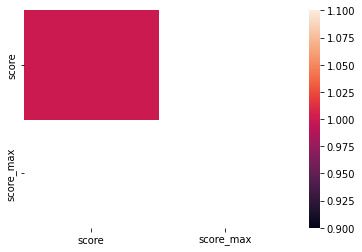

In [15]:
sns.heatmap(df.corr())

Even the correlation of the data is not proper. The score is showing correlation with itself.

### 1c) Round off scores to the nearest integers.

In [16]:
df['score']

0         10.0
1         10.0
2          6.0
3          9.2
4          4.0
          ... 
163832     2.0
163833    10.0
163834     2.0
163835     8.0
163836     2.0
Name: score, Length: 1415133, dtype: float64

In [17]:
df['score'] = df['score'].fillna(df['score'].mean()).astype(int)
  


In [18]:
for i in df['score']:
  i = round(i)
  

In [19]:
df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [20]:
df.score

0         10
1         10
2          6
3          9
4          4
          ..
163832     2
163833    10
163834     2
163835     8
163836     2
Name: score, Length: 1415133, dtype: int64

we can see that above the data type of the feature df.score has been changed from float64 to int64

Therefore we can see that in the above dataframe the feature score has no decimals beside it and all the records are converted into integers

### 1d) Check for missing values. Impute the missing values, if any

In [21]:
df.replace(to_replace=' ', value=np.nan, inplace=True)

In [22]:
df.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

#### Imputing: 
1. Imputing the nan values of df.score_max with mean. <br>
2. Imputing the values of df.extract with mode. <br>
3. Imputing the values of df.author with mode. <br>
4. Imputing the values of df.product with mode.

In [23]:
df['score_max'].fillna(df['score_max'].mean(), inplace=True)

In [24]:
df['extract'].fillna(df['extract'].mode()[0], inplace=True)

In [25]:
df['author'].fillna(df['author'].mode()[0], inplace=True)

In [26]:
df['product'].fillna(df['product'].mode()[0], inplace=True)

In [27]:
df.isna().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1415133 non-null  int64  
 7   score_max  1415133 non-null  float64
 8   extract    1415133 non-null  object 
 9   author     1415133 non-null  object 
 10  product    1415133 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 129.6+ MB


Therefore, we can observe that all the null values are imputed. As there are no missing records from df.info() and df.isna().sum()

### 1e) Check for duplicate values and remove them, if any

In [29]:
df.duplicated().sum()

6430

We can observe from the output that there are 6430 duplicate values in the dataframe. <br>

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

0

Therefore all the duplicate values are removed using drop_duplicates(inplace=True) . <br>
As we can see that there are 0 duplicate values after dropping the duplicate values from the dataframe.

### 1f) Keep only 1 Million data samples. Use random state=612

In [32]:
df = df.sample(n=1000000, random_state=612)

In [33]:
df.shape

(1000000, 11)

Therefore, the dataframe has been sampled to ! million, with a random state of 612. <br>

### 1g) Drop irrelevant features. Keep features like Author, Product, and Score.

In [34]:
df.columns

Index(['phone_url', 'date', 'lang', 'country', 'source', 'domain', 'score',
       'score_max', 'extract', 'author', 'product'],
      dtype='object')

In [35]:
drop_cols = ['phone_url', 'date', 'lang', 'country', 'source', 'domain','score_max', 'extract']

In [36]:
df.drop(columns=drop_cols, inplace=True)

In [37]:
df.head()

,score,author,product
100431,10,cat19y,Samsung Galaxy Ace GT-S5830
15887,8,dazzer86,Sony Xperia S
54918,10,Martin,Apple iPhone 7 128GB Black
17943,2,Amazon Customer,Samsung Galaxy Ace 2 I8160 4GB White WiFi Andr...
153696,8,WOLSWIJK,Sony Xperia X Compact zwart / 32 GB


In [38]:
df.shape

(1000000, 3)

Therefore, all the irrelevant features have been dropped. <br>
Now, the dataframe 'df' consists of only 3 features. <br>

# Question 2

### 2a) Identify the most rated features

In [39]:
df.groupby('product')['score'].mean().sort_values(ascending=False)

product
'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...    10.0
Huawei Ascend G300 - 4 4GB                                                                                                    10.0
Huawei Ascend G330 - Smartphone (10,16 cm (4"), 800 x 480 Pixeles, LCD, 1 GHz, Qualcomm, MSM 8225) Color blanco...            10.0
Huawei Ascend G330 - Smartphone libre Android (pantalla tÃ¡ctil de 4", cÃ¡mara 5 Mp) color negro [Importado de Alemania]      10.0
Huawei Ascend G330 Telefono Cellulare                                                                                         10.0
                                                                                                                              ... 
HTC Imagio (Verizon Wireless)                                                                                                  1.0
LG Optimus S - purple (Sprint)                                             

There are 56504 products which has scores ranging from 10 to 1 .

In [40]:
df1 = df.loc[df['score'] == 10]

In [41]:
df1.groupby('product')['score'].mean().sort_values(ascending=False)

product
'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...                             10.0
Samsung Galaxy E7 (White, 16GB)                                                                                                                        10.0
Samsung Galaxy Core Prime Value Edition Smartphone dÃ©bloquÃ© 4G (Ecran : 4,5 pouces - 8 Go - Simple MicroSIM - Android 5.1 Lollipop) Blanc            10.0
Samsung Galaxy Core Prime Value Edition Smartphone dÃ©bloquÃ© 4G (Ecran : 4,5 pouces - 8 Go - Simple MicroSIM - Android 5.1 Lollipop) Charcoal Gray    10.0
Samsung Galaxy Core Prime, Charcoal Grey 8GB (Verizon Wireless)                                                                                        10.0
                                                                                                                                                       ... 
LG G4 H815 32GB BROWN LEATHER FACTORY UNLOCKED 4G/LTE CE

Therfore we can say that there are 41631 products that have a score of 10.

### 2b) Identify the users with most number of reviews

In [42]:
user_max = pd.DataFrame(df.groupby('author')['score'].mean().sort_values(ascending=False))

In [43]:
user_max['Number of Reviews'] = pd.DataFrame(df.groupby('author')['score'].count().sort_values(ascending=False))

In [44]:
user_max

,score,Number of Reviews
author,,
efef,10.0,1
smartcalm,10.0,1
"M. L. Gregory ""jhawk1000""",10.0,1
andruishenko,10.0,1
andrujazz,10.0,1
...,...,...
zyted,0.0,1
uretc,0.0,1
judjenuro,0.0,1


In [45]:
user_max.describe()

,score,Number of Reviews
count,596838.000000,596838.000000
mean,8.028904,1.675497
std,2.470817,129.487622
min,0.000000,1.000000
25%,7.666667,1.000000
50%,8.666667,1.000000
75%,10.000000,1.000000
max,10.000000,98574.000000


From the user_max.describe() we can say that the user with most number of reviews is 98574. In order to identify the number of reviews of each user we used the count function already above. Now, we use the groupby method with sort_values function.

In [46]:
user_max_sorted = pd.DataFrame(user_max.groupby('author')['Number of Reviews'].mean().sort_values(ascending=False))

In [47]:
user_max_sorted.head(20)

,Number of Reviews
author,
Amazon Customer,98574.0
Cliente Amazon,13614.0
e-bit,5965.0
Client d'Amazon,5499.0
Amazon Kunde,3295.0
Anonymous,1898.0
einer Kundin,1894.0
einem Kunden,1370.0
unknown,1210.0


The above dataframe "user_max_sorted" gives out the top 20 users with most number of reviews.

### 2c) Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [48]:
reindex_cols = ['product', 'author', 'score']

In [49]:
df = df.reindex(columns=reindex_cols)

In [50]:
df.head()

,product,author,score
100431,Samsung Galaxy Ace GT-S5830,cat19y,10
15887,Sony Xperia S,dazzer86,8
54918,Apple iPhone 7 128GB Black,Martin,10
17943,Samsung Galaxy Ace 2 I8160 4GB White WiFi Andr...,Amazon Customer,2
153696,Sony Xperia X Compact zwart / 32 GB,WOLSWIJK,8


In [51]:
#df['product ratings'] = pd.DataFrame(df.groupby('product')['product'].transform(lambda x: ' '.join(x)))

In [52]:
df_grouped = pd.DataFrame()
df_grouped['product_ratings'] = pd.DataFrame(df.groupby('product')['score'].count().sort_values(ascending=False))

In [53]:
df_grouped.head()

,product_ratings
product,
"Lenovo Vibe K4 Note (White,16GB)",3701
"Lenovo Vibe K4 Note (Black, 16GB)",3093
"OnePlus 3 (Graphite, 64 GB)",2890
"OnePlus 3 (Soft Gold, 64 GB)",2522
Huawei P8lite zwart / 16 GB,1895


In [54]:
df_grouped.drop(df_grouped[df_grouped['product_ratings']<=50].index, inplace=True)

In [55]:
df_grouped.reset_index(inplace=True)

In [56]:
df_grouped.head()

,product,product_ratings
0,"Lenovo Vibe K4 Note (White,16GB)",3701
1,"Lenovo Vibe K4 Note (Black, 16GB)",3093
2,"OnePlus 3 (Graphite, 64 GB)",2890
3,"OnePlus 3 (Soft Gold, 64 GB)",2522
4,Huawei P8lite zwart / 16 GB,1895


In [57]:
df_new = pd.merge(df , df_grouped, how='inner', on='product')

In [58]:
df_new

,product,author,score,product_ratings
0,Samsung Galaxy Ace GT-S5830,cat19y,10,719
1,Samsung Galaxy Ace GT-S5830,antrap2005,8,719
2,Samsung Galaxy Ace GT-S5830,Dterr,6,719
3,Samsung Galaxy Ace GT-S5830,RikkyT,8,719
4,Samsung Galaxy Ace GT-S5830,Amazon Customer,8,719
...,...,...,...,...
557303,Sony Xperia Z2 D6503,linds,10,58
557304,Sony Xperia Z2 D6503,bjornla86,10,58
557305,Sony Xperia Z2 D6503,Jarbo,9,58
557306,Sony Xperia Z2 D6503,Rexus.,9,58


In [59]:
df_grouped_user = pd.DataFrame()
df_grouped_user['user ratings'] = df.groupby('author')['score'].count().sort_values(ascending=False)

In [60]:
df_grouped_user.head()

,user ratings
author,
Amazon Customer,98574
Cliente Amazon,13614
e-bit,5965
Client d'Amazon,5499
Amazon Kunde,3295


In [61]:
df_grouped_user.drop(df_grouped_user[df_grouped_user['user ratings']<=50].index, inplace=True)
df_grouped_user.head()
df_grouped_user.head(3)

,user ratings
author,
Amazon Customer,98574
Cliente Amazon,13614
e-bit,5965


In [62]:
df_grouped_user.reset_index(inplace=True)

In [63]:
print('min value is :',df_grouped_user.min())
print('max value is :',df_grouped_user.max())

min value is : author           #
user ratings    51
dtype: object
max value is : author          Ð°Ð½Ð´ÑÐµÐ¹
user ratings           98574
dtype: object


In [64]:
df_new = pd.merge(df , df_grouped_user, how='inner', on='author')

In [65]:
df_new

,product,author,score,user ratings
0,Apple iPhone 7 128GB Black,Martin,10,277
1,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Martin,10,277
2,Apple iPhone 6 Gold 128GB SIM-Free Smartphone ...,Martin,10,277
3,Acer Liquid Z630S Dual-SIM LTE Smartphone (14 ...,Martin,10,277
4,HTC One X White,Martin,10,277
...,...,...,...,...
211600,Sony Xperia Z1 zwart / 16 GB,Anoniem,8,52
211601,"Samsung Galaxy S7 goud, roze / 32 GB",Anoniem,9,52
211602,Huawei P9 lite wit / 16 GB,Anoniem,8,52
211603,Motorola Moto G 4 gen wit / 16 GB - Overzicht,Anoniem,9,52


In [66]:
df_new = pd.merge(df_new, df_grouped, on='product')

In [67]:
df_new.dropna(axis=0, inplace=True)

In [68]:
df_new

,product,author,score,user ratings,product_ratings
0,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Martin,10,277,60
1,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,8,98574,60
2,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,10,98574,60
3,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,8,98574,60
4,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,10,98574,60
...,...,...,...,...,...
129625,Samsung Galaxy S5 goud / 16 GB,Anoniem,8,52,340
129626,Samsung Galaxy S5 goud / 16 GB,Anoniem,8,52,340
129627,Samsung Galaxy S5 goud / 16 GB,Anoniem,9,52,340
129628,Samsung Galaxy S5 goud / 16 GB,Anoniem,10,52,340


In [69]:
df_new.shape

(129630, 5)

Therefore after grouping the products and counting the ratings given for each product by the user which is more than 50, the shape of the new dataframe consists of 129630 records of data.

# 3.) Build a popularity based model and recommend top 5 mobile phones

Considering the data frame “df_new” for the popularity based model:

In [70]:
df_new.head()

,product,author,score,user ratings,product_ratings
0,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Martin,10,277,60
1,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,8,98574,60
2,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,10,98574,60
3,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,8,98574,60
4,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,10,98574,60


 so now to get the top 5 mobile phones based on popularity:

In [78]:
df_top5_mobile = df_new.copy(deep=True)
df_top5_mobile.head()

,product,author,score,user ratings,product_ratings
0,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Martin,10,277,60
1,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,8,98574,60
2,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,10,98574,60
3,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,8,98574,60
4,Cubot NOTE S 4150 mAh Big Battery 3G Unlocked ...,Amazon Customer,10,98574,60


In [79]:
top5_cols_drop = ['author', 'user ratings']

In [80]:
df_top5_mobile.drop(columns=top5_cols_drop, inplace=True)

In [81]:
df_top5_mobile = pd.DataFrame(df_top5_mobile.groupby('product')['score'].count().sort_values(ascending=False))

In [83]:
df_top5_mobile = df_top5_mobile.head()

In [84]:
df_top5_mobile

,score
product,
"Lenovo Vibe K4 Note (White,16GB)",2191
"Lenovo Vibe K4 Note (Black, 16GB)",1833
"OnePlus 3 (Graphite, 64 GB)",1306
"OnePlus 3 (Soft Gold, 64 GB)",1236
"Lenovo Vibe K5 (Gold, VoLTE update)",1120


The above DataFrame recommends the top 5 mobile phones based on popularity of by grouping and counting methods of "product" , "score"

# Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch youcan limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model

In [88]:
from surprise import SVD

In [89]:
model_svd = SVD()
